<a href="https://colab.research.google.com/github/Yomex139/example/blob/main/Dog_Vision_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

# importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
print('Oh Yesssssss!!!!! GPU is Available' if tf.config.list_physical_devices('GPU') else 'oh noooooooooo :(')

Oh Yesssssss!!!!! GPU is Available


# unzip dataset(dog-vision dattaset

In [ ]:
#!unzip 'drive/MyDrive/Dog-Vision/dog-breed-identification.zip' -d 'drive/MyDrive/Dog-Vision-Project'

In [ ]:
import os
#len(os.listdir('drive/MyDrive/Dog-Vision-Project/train'))

# importing dataset(Dog-Vision)

In [ ]:
labels = pd.read_csv('drive/MyDrive/Dog-Vision-Project/labels.csv')
labels.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     623b2fb2677dd95ef450d9cac3995bc4  scottish_deerhound
freq                                   1                 126

In [ ]:
labels.count()

id       10222
breed    10222
dtype: int64

In [ ]:
labels.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
# print('oh yesssss!!!,labels and traning files are equal' if len(os.listdir('drive/MyDrive/Dog-Vision-Project/train')) == len(labels)
#  else 'oh nooo, not equal')

In [ ]:
labels.tail()

id                     breed
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

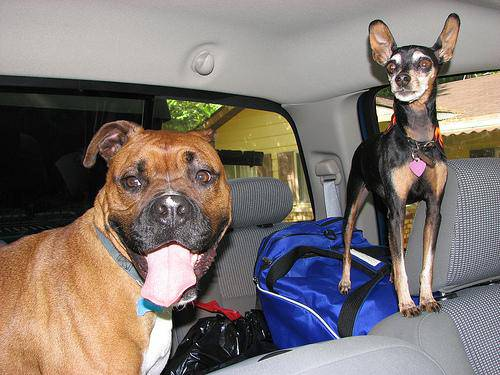

In [ ]:
from IPython.display import Image
Image('drive/MyDrive/Dog-Vision-Project/train/ffe5f6d8e2bff356e9482a80a6e29aac.jpg')

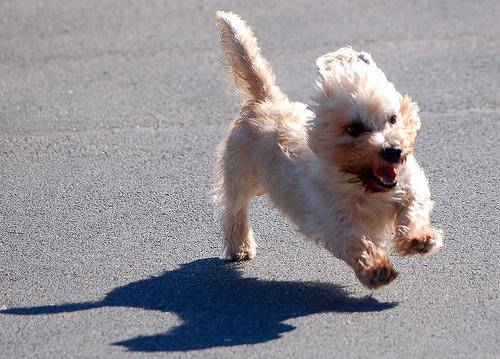

In [ ]:
Image('drive/MyDrive/Dog-Vision-Project/train/ffd3f636f7f379c51ba3648a9ff8254f.jpg')

# extracting filename from labels(id)

In [ ]:
filenames = ['drive/MyDrive/Dog-Vision-Project/train/'+fname+'.jpg'  for fname in labels['id']]
filenames[:10]

['drive/MyDrive/Dog-Vision-Project/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog-Vision-Project/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog-Vision-Project/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog-Vision-Project/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog-Vision-Project/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog-Vision-Project/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog-Vision-Project/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog-Vision-Project/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog-Vision-Project/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog-Vision-Project/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
Image(filenames[5])
labels['breed'][5]

'bedlington_terrier'

In [ ]:
print('they are equal!!!!!' if len(filenames) == len(os.listdir('drive/MyDrive/Dog-Vision-Project/train')) else 'not equal:(')

they are equal!!!!!


In [ ]:
labels['id'][:10]

0    000bec180eb18c7604dcecc8fe0dba07
1    001513dfcb2ffafc82cccf4d8bbaba97
2    001cdf01b096e06d78e9e5112d419397
3    00214f311d5d2247d5dfe4fe24b2303d
4    0021f9ceb3235effd7fcde7f7538ed62
5    002211c81b498ef88e1b40b9abf84e1d
6    00290d3e1fdd27226ba27a8ce248ce85
7    002a283a315af96eaea0e28e7163b21b
8    003df8b8a8b05244b1d920bb6cf451f9
9    0042188c895a2f14ef64a918ed9c7b64
Name: id, dtype: object

In [ ]:
labels['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

85.18333333333334

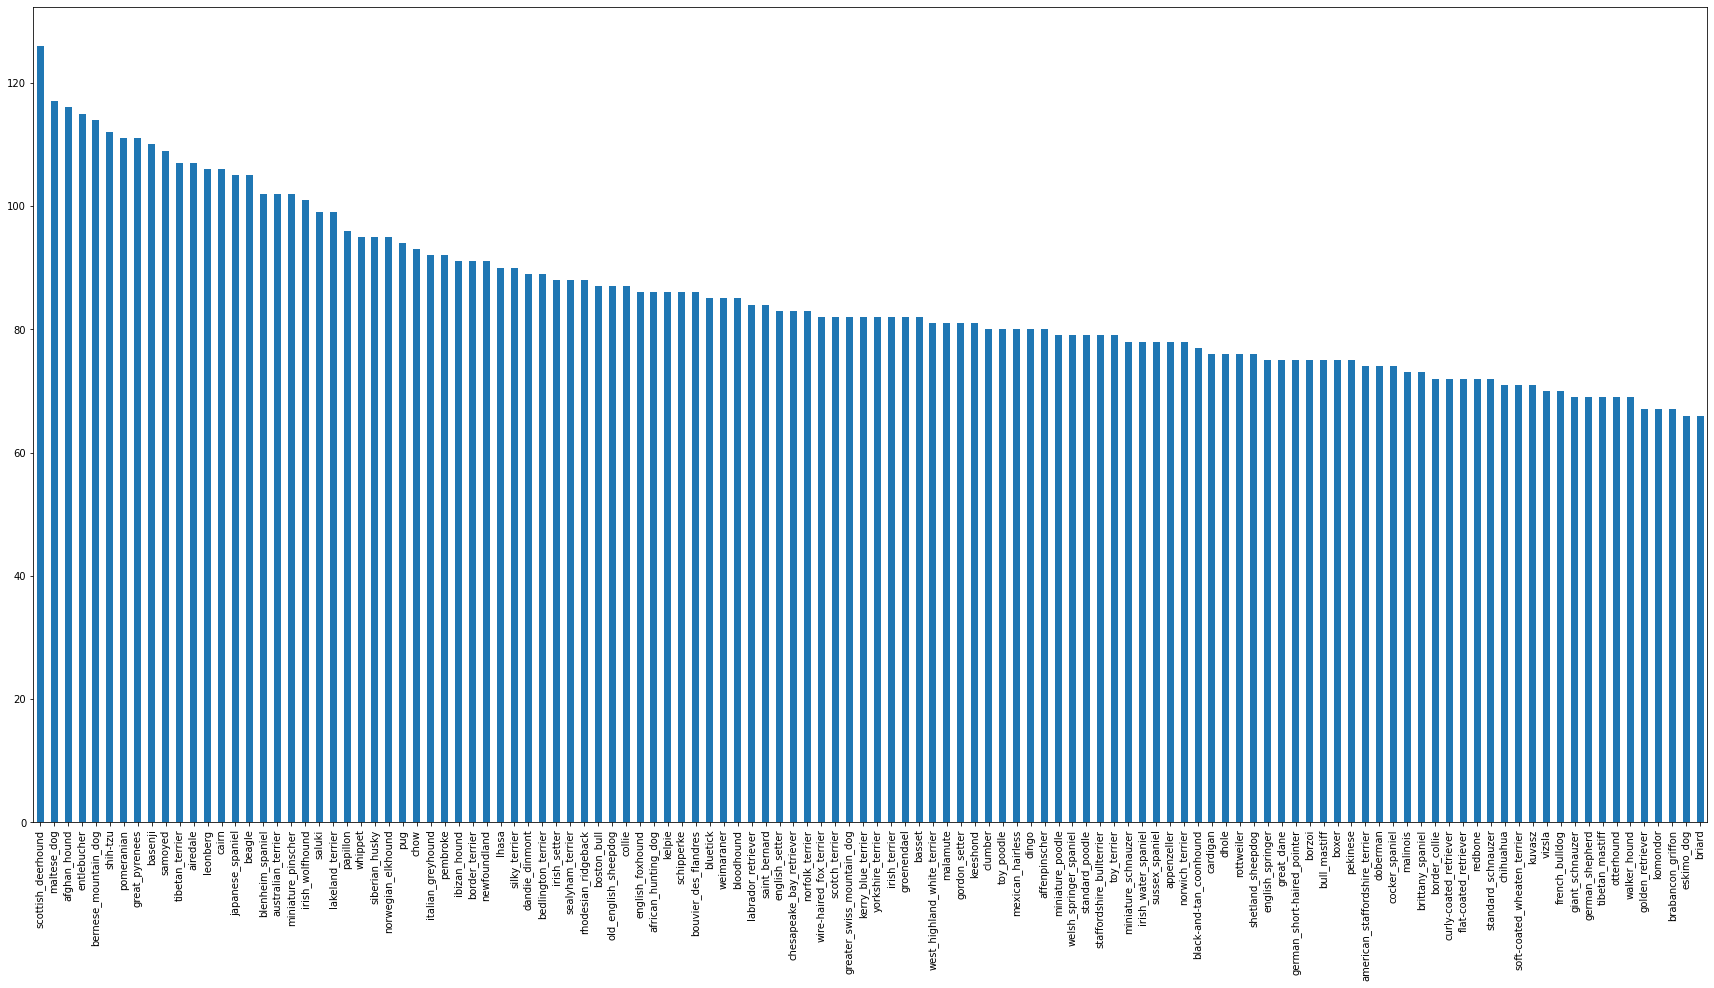

In [ ]:
plt.figure(figsize=(30,15))
labels['breed'].value_counts().plot(kind='bar')
np.mean(labels['breed'].value_counts())

# converting label(breed) column into boolean

In [ ]:
breed = labels['breed'].to_numpy()
len(breed)

10222

In [ ]:
unique_breed = np.unique(labels['breed'])
len(unique_breed)

120

In [ ]:
unique_breed

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
[breed[90]==unique_breed]


[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False])]

In [ ]:
boolean_breed = [label == unique_breed for label in breed ]
len(boolean_breed)


10222


drive/MyDrive/Dog-Vision-Project/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]

['dingo']

(array([37]),)

37

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 

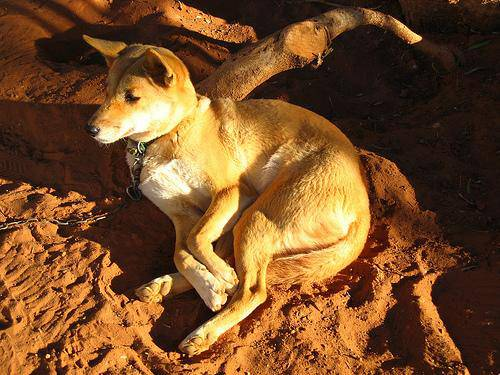

In [ ]:
index = 1
print('')
print(filenames[index])
print('')
print(boolean_breed[index])
print('')
print(unique_breed[boolean_breed[index]])
print('')
print(np.where(unique_breed==breed[index]))
print('')
print(boolean_breed[index].argmax())
print('')
print(boolean_breed[index].astype(int))
Image(filenames[index])

Splitting dataset into X and Y and splitting into training and validating set

In [ ]:
len(filenames),len(boolean_breed)

(10222, 10222)

In [ ]:
DATA_x =1000 #@param {'type':'slider','min':1000,'max':10000,'step':1000}

import sklearn
from sklearn.model_selection import train_test_split

X = filenames
Y = boolean_breed

X_train,X_valid,Y_train,Y_valid = train_test_split(X[:DATA_x],
                                                   Y[:DATA_x],
                                                   test_size=.2,
                                                   random_state=5)
len(X_train),len(X_valid),len(Y_train),len(Y_valid)

(800, 200, 800, 200)

# creating function to preprocessing the image(X)

In [ ]:
IMAGE_SIZE = 224
def preprocess_image(imagepath,img_size=IMAGE_SIZE):
  image = tf.io.read_file(imagepath)
  image = tf.image.decode_jpeg(image,channels=3)
  image = tf.image.convert_image_dtype(image,dtype=tf.float32)
  image = tf.image.resize(image,size=([IMAGE_SIZE,IMAGE_SIZE]))
  return image


# function to returning tupple of image and label

In [ ]:
def tupple_image_label(imagepath,label):
  '''
  return tupple of image and label
  '''
  image = preprocess_image(imagepath)
  return image,label

# creating model function

In [ ]:
BATCH_SIZE = 32
def Tensor_batches(X,Y=None,Train_data=False,Valid_data=False):
  '''
  creating functions for trainig,validation and testing dataset
  '''
  #training dataset
  if Train_data:
    print('creating training dataset..............:)')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                            tf.constant(Y)))
    data = data.shuffle(buffer_size=len(X))
    data = data.map(tupple_image_label)
    data = data.batch(batch_size=BATCH_SIZE)

    return data
  elif Valid_data:
    print('creating validation dataset...........:)')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(Y)))
    data = data.map(tupple_image_label)
    data = data.batch(BATCH_SIZE)
    return data
  else:
    print('creating test dataset..........:)')
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
    data = data.map(preprocess_image)
    data = data.batch(batch_size=BATCH_SIZE)
    return data


# training and validation graph


In [ ]:
Trained_data = Tensor_batches(X_train,
                              Y_train,
                              Train_data=True)

Validation_data = Tensor_batches(X_valid,
                                 Y_valid,
                                 Valid_data=True)

creating training dataset..............:)
creating validation dataset...........:)


In [ ]:
Trained_data.element_spec,Validation_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

# Visualization and data unbatching

In [ ]:
def plot_25_images(image,label):
  plt.figure(figsize=(20,15))
  for i in range(25):
    ax = plt.subplot(5,5,(i+1))
    imge = image[i]
    labe = unique_breed[label[i].argmax()]
    plt.imshow(imge)
    plt.title(f'breed is {labe}')
    plt.axis('off')

In [ ]:
Trained_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
#training data unbatch first 32 batches
train_image,train_label = next(Trained_data.as_numpy_iterator())

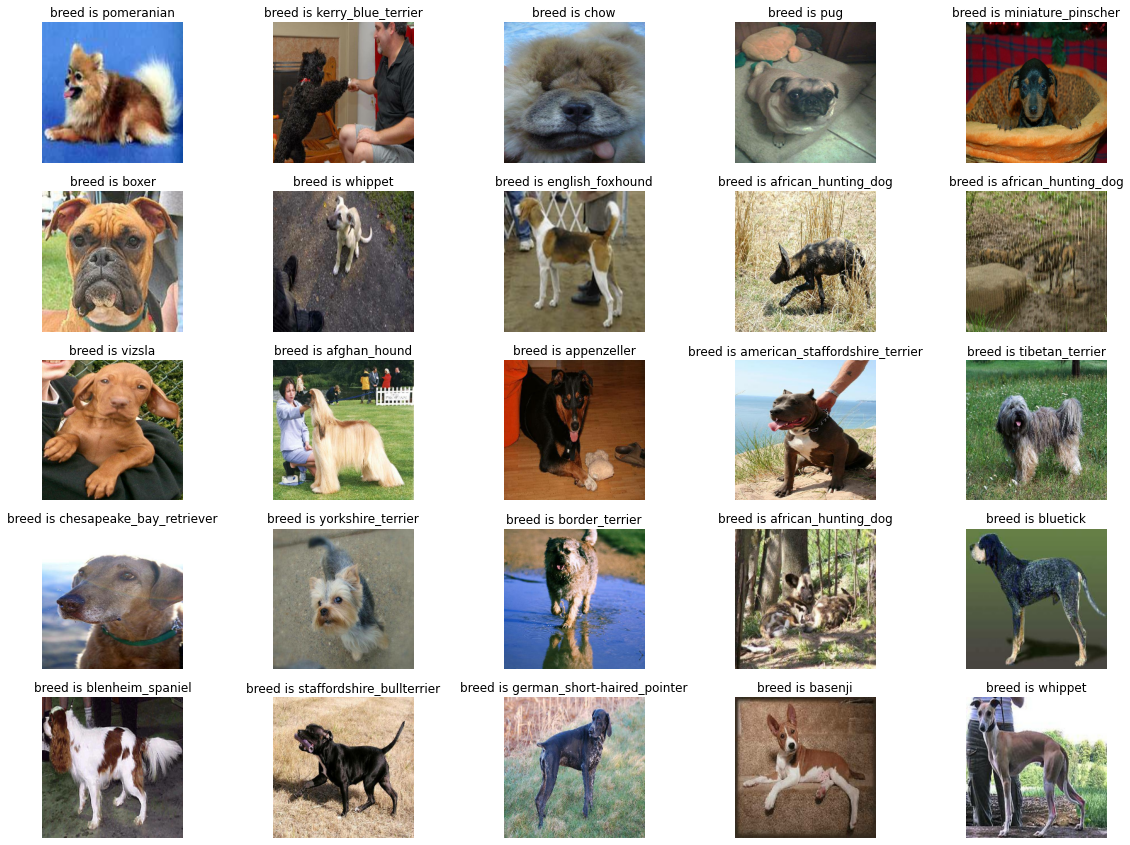

In [ ]:
#Visualizing training dataset
plot_25_images(train_image,
                train_label)

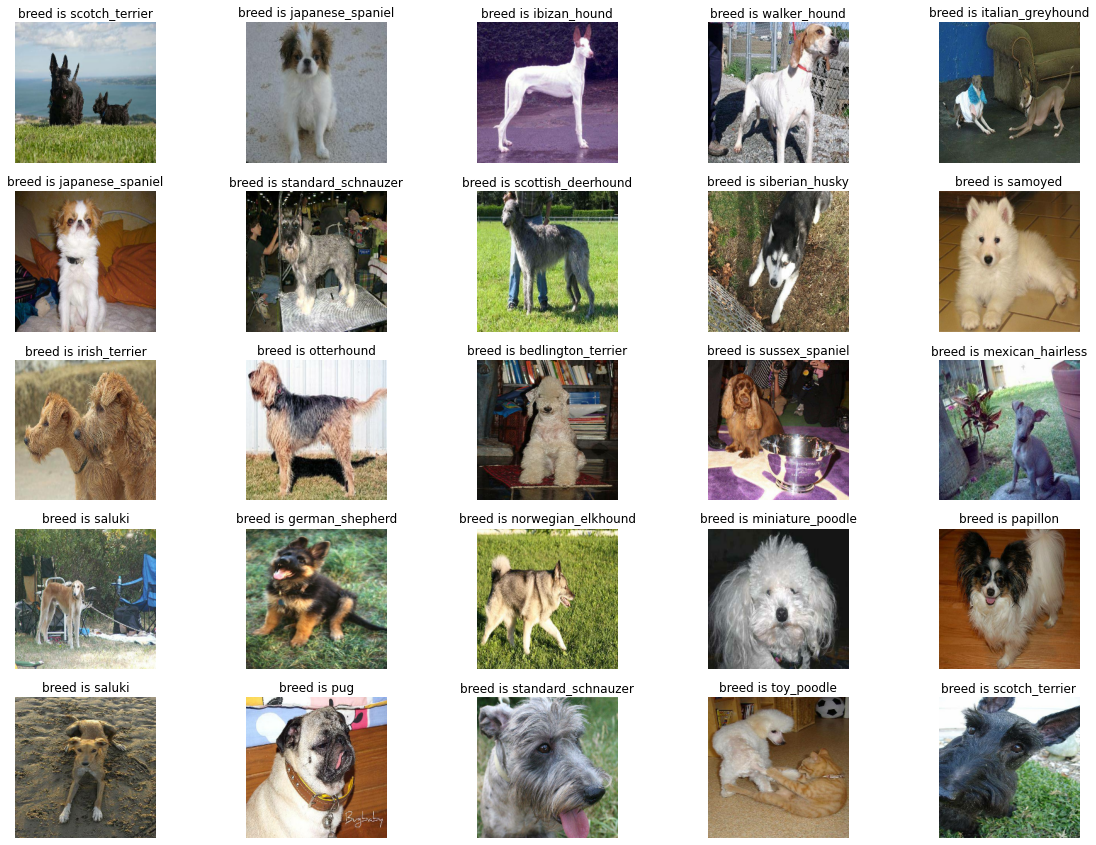

In [ ]:
#unbatching validation dtaset
Val_images,Val_label = next(Validation_data.as_numpy_iterator())
#Visualising Validation dataset
plot_25_images(Val_images,
               Val_label)

In [ ]:
len(Val_images)

32

# function to create model

In [ ]:
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5'
INPUT_SHAPE = [None,224,224,3]
OUTPUT_SHAPE = len(unique_breed)

def Create_model(imput=INPUT_SHAPE,output=OUTPUT_SHAPE,model_url=MODEL_URL):
  print(f'Creating model base on {MODEL_URL} thanks i love you.....:)')
  model = tf.keras.models.Sequential(
                                      [
                                         hub.KerasLayer(MODEL_URL),   #first layer
                                         tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                         activation='softmax')    #second layer
                                      ]
                                     )
  model.compile(
                loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )
  model.build(INPUT_SHAPE)
  return model

In [ ]:
model = Create_model()
model.summary()

Creating model base on https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5 thanks i love you.....:)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


# function to create callback

In [ ]:
%load_ext tensorboard
import datetime as dt
time = dt.datetime.now().strftime('%Y/%m/%d--%H-%M-%S')

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
#creating function for callback
def tensorboard_callback():
  Log_path = os.path.join(
                           'drive/MyDrive/Dog-Vision-Project/Callback_Log',
                           time
                          )
  return tf.keras.callbacks.TensorBoard(Log_path)

#early_stopping
Early_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)

# function to train model

In [ ]:
NUM_EPOCHS = 100
def model_train(x):
  print(f'training model with {MODEL_URL} .................:)')
  model.fit(x=Trained_data,
            epochs=NUM_EPOCHS,
            verbose=2,
            callbacks=[tensorboard_callback(),Early_callback],
            validation_data=Validation_data)
  return model

# Training model

In [ ]:
Model = model_train(x=Trained_data)

training model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5 .................:)
Epoch 1/100
25/25 - 159s - loss: 4.5299 - accuracy: 0.0812 - val_loss: 3.2416 - val_accuracy: 0.3100
Epoch 2/100
25/25 - 3s - loss: 1.6357 - accuracy: 0.6875 - val_loss: 2.0287 - val_accuracy: 0.4900
Epoch 3/100
25/25 - 3s - loss: 0.5656 - accuracy: 0.9312 - val_loss: 1.4683 - val_accuracy: 0.6350
Epoch 4/100
25/25 - 3s - loss: 0.2492 - accuracy: 0.9925 - val_loss: 1.2782 - val_accuracy: 0.6550
Epoch 5/100
25/25 - 3s - loss: 0.1396 - accuracy: 1.0000 - val_loss: 1.1873 - val_accuracy: 0.6600
Epoch 6/100
25/25 - 3s - loss: 0.0963 - accuracy: 1.0000 - val_loss: 1.1392 - val_accuracy: 0.6650
Epoch 7/100
25/25 - 3s - loss: 0.0725 - accuracy: 1.0000 - val_loss: 1.1089 - val_accuracy: 0.6550
Epoch 8/100
25/25 - 3s - loss: 0.0576 - accuracy: 1.0000 - val_loss: 1.0763 - val_accuracy: 0.6700
Epoch 9/100
25/25 - 3s - loss: 0.0475 - accuracy: 1.0000 - val_loss: 1.0591 - val_accuracy: 0.

In [ ]:
prediction = Model.predict(Validation_data,
              verbose=1)

7/7 [==============================] - 3s 75ms/step


# unbatching full dataset(validation dataset)

In [ ]:
imagge = []
labbel = []
def unbatch_data(data):
  for i,v in data.unbatch():
    img = imagge.append(i)
    tnt = labbel.append(v)
  return data

In [ ]:
unbatch_data(Validation_data)

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
len(imagge)

200

In [ ]:
# tanta = []
# bunbu = []
# def tbatch_data(data):
#   for i,v in data.unbatch():
#     img = tanta.append(i)
#     tnt = bunbu.append(v)
#   return data

In [ ]:
#tbatch_data(Trained_data)

In [ ]:
#tanta[0]

# more visualization of validation dataset(comparing pridiction with truth label)

In [ ]:
#function to get breed_label(unique_breed)
def get_breed_label(prediction):
  '''
  function get the prediction breed with ease
  '''
  pred = unique_breed[prediction.argmax()]
  return pred
#function to get truth_label
def get_truth_label(truth_label):
  '''
  function return the truth breed
  '''
  return unique_breed[truth_label]
#function to return top_10 predictions
# def top_10_pred(n):
#   '''
#   return top 10 predictions
#   '''
#   pred = prediction[n][prediction[n].argsort()][::-1][:10]
#   return pred

#top 10 unique_breed
def top_10_unique(n):
  '''
  return the top 10 breed label
  '''
  top_10 = unique_breed[prediction[n].argsort()[::-1][:10]]
  return top_10



In [ ]:
def Visualisation(image,truth_label,prediction):
  plt.figure(figsize=(25,10),facecolor='grey')
  for num in range(15):
    ima,label,pred = image[num],truth_label[num],prediction[num]
    max = pred[pred.argmax()]
    color = 'green' if get_truth_label(label)==get_breed_label(pred) else 'grey'
    ax = plt.subplot(3,5,num+1)
    plt.imshow(ima)
    plt.title(f'{get_truth_label(label)} pred={max*100:.1f}% {get_breed_label(pred)}',
              color=color)

    #plt.tight_layout(h_pad=5)
    plt.axis('off')

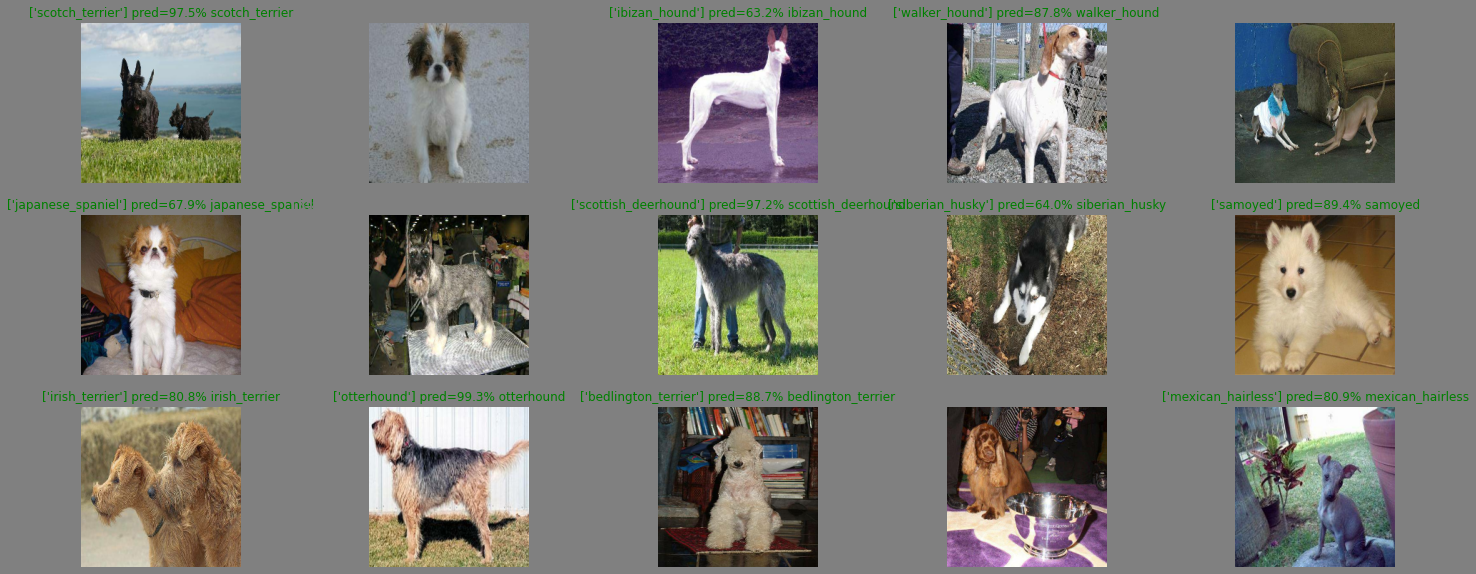

In [ ]:
Visualisation(image=imagge,
              truth_label=labbel,
              prediction=prediction)

# visualising top ten predictions

In [ ]:
def Visualize_1(truth_label,prediction,n):
  plt.figure(figsize=(25,20),facecolor='grey')
  for num in range(15):
    ax = plt.subplot(3,5,num+1)
    label,pred = truth_label[num],prediction[num]
    top_10_index = pred.argsort()[::-1][:10]
    top_10_value = pred[top_10_index]
    top_10_label = unique_breed[top_10_index]
    plt.bar(np.arange(len(top_10_index)),top_10_value,
            color='green' if get_breed_label(pred)==get_truth_label(label) else 'grey')
    plt.xticks(np.arange(len(top_10_index)),
               labels=top_10_label,
               rotation='vertical')
    plt.title(f'prediction is {get_breed_label(pred)} {pred.max()*100:.0f}%',
              )
    plt.tight_layout(h_pad=1.0)
  plt.show()

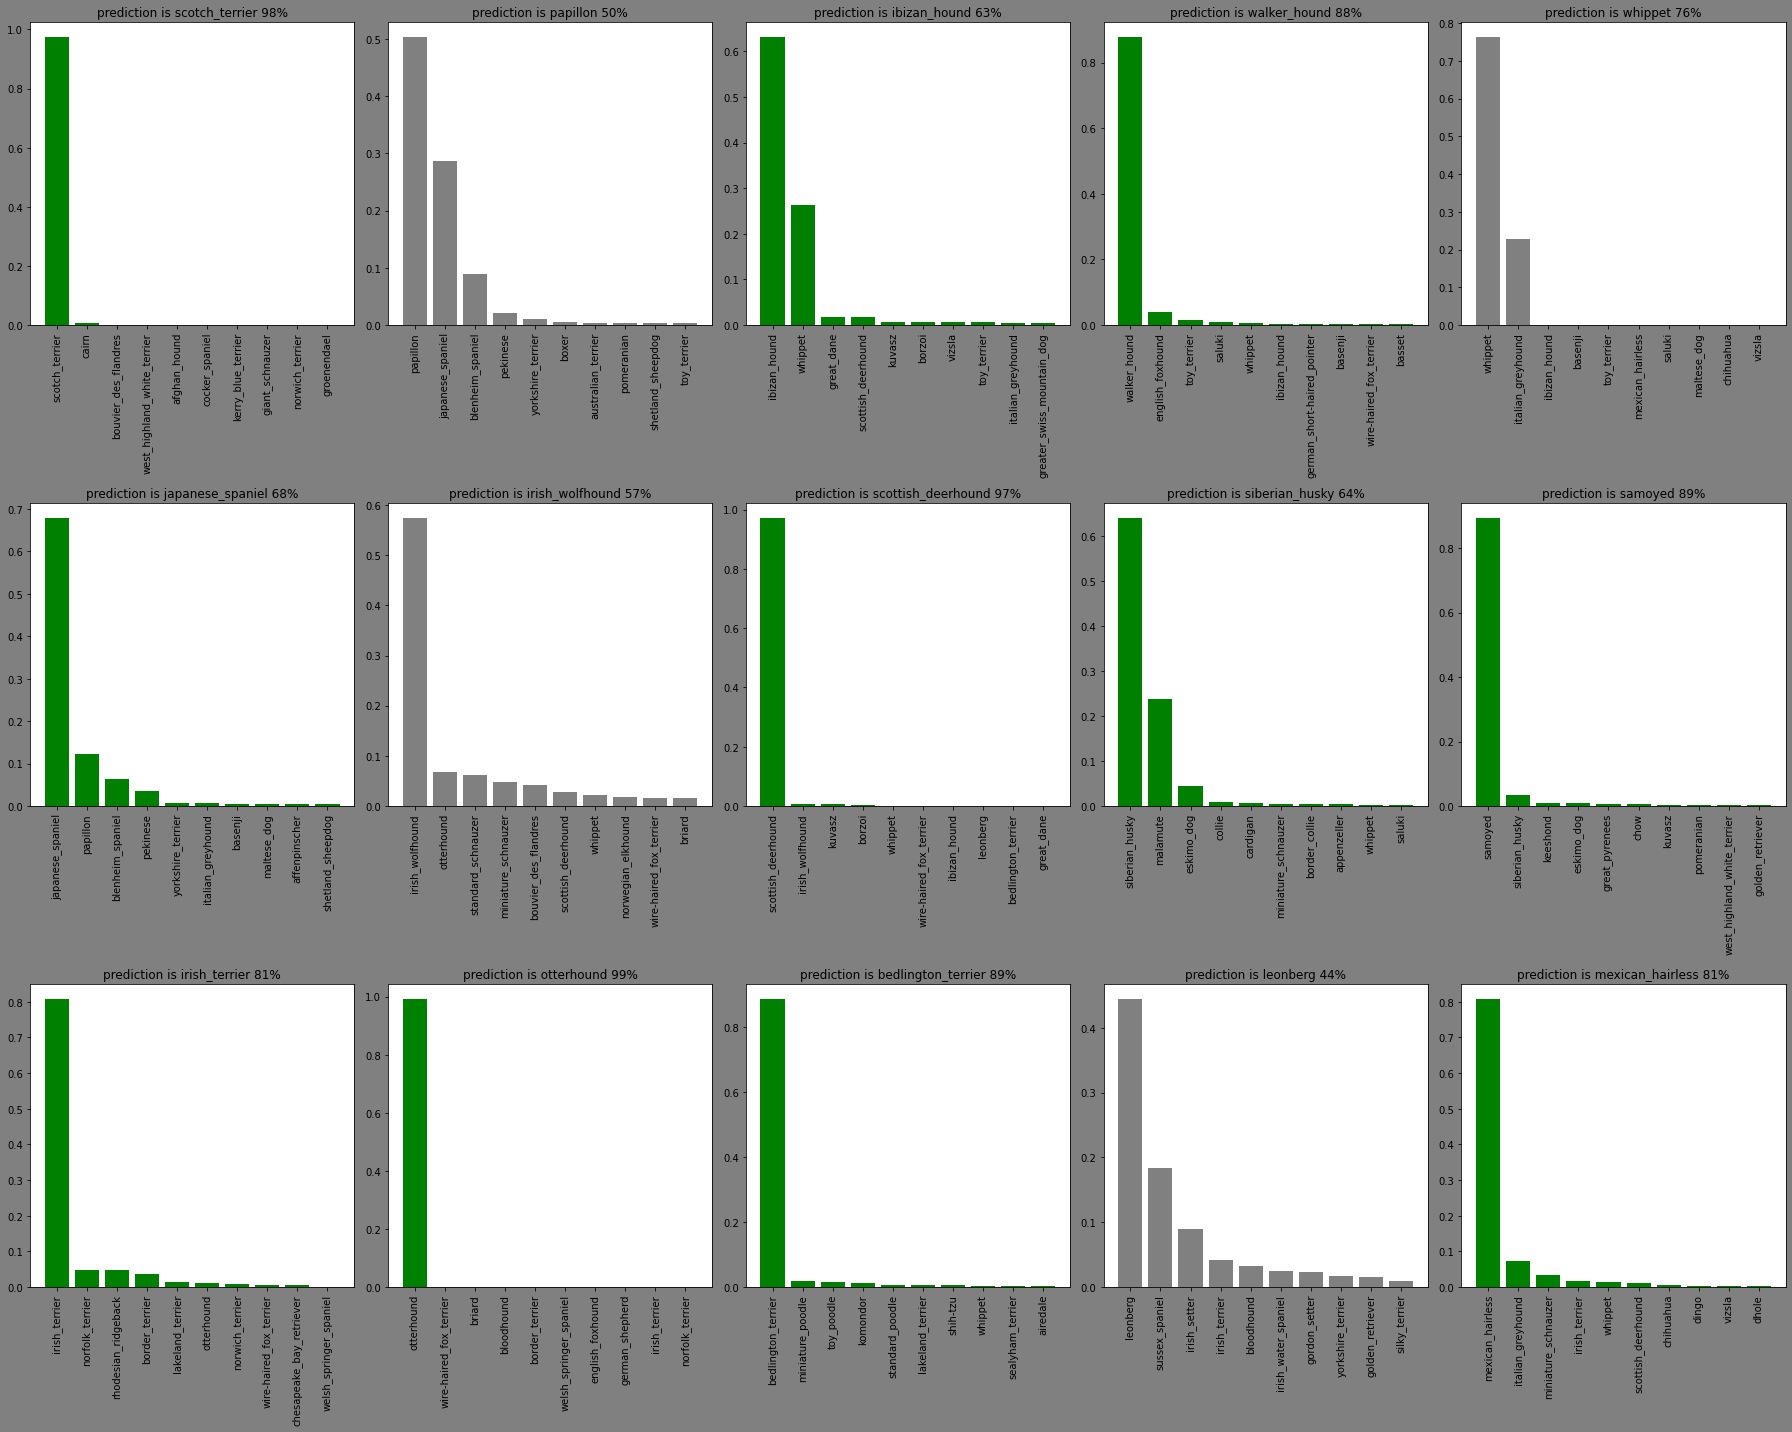

In [ ]:
Visualize_1(truth_label=labbel,
            prediction=prediction,
            n=0)

In [ ]:
def Visualiz_1(truth_label,prediction,n):
  label,pred = truth_label[n],prediction[n]
  top_10_index = pred.argsort()[::-1][:10]
  top_10_value = pred[top_10_index]
  top_10_label = unique_breed[top_10_index]
  plt.bar(np.arange(len(top_10_index)),top_10_value,
          color='green' if get_breed_label(pred)==get_truth_label(label) else 'grey')
  plt.xticks(np.arange(len(top_10_index)),
              labels=top_10_label,
              rotation='vertical')
  plt.title(f'prediction is {get_breed_label(pred)} {pred.max()*100:.0f}%')
  plt.tight_layout(h_pad=1.0)
  plt.show()

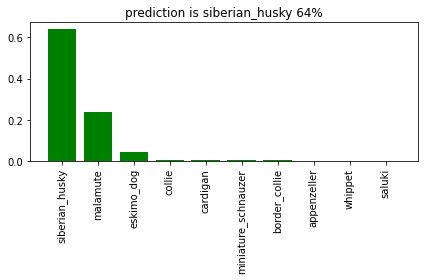

In [ ]:
Visualiz_1(truth_label=labbel,prediction=prediction,n=8)

In [ ]:
def Visualiz_2(image,truth_label,prediction,n):
    image,label,pred = image[n],truth_label[n],prediction[n]
    max = pred[pred.argmax()]
    color = 'green' if get_truth_label(label)==get_breed_label(pred) else 'grey'
    plt.imshow(image)
    plt.title(f'{get_truth_label(label)} pred={max*100:.1f}% {get_breed_label(pred)}',
              color=color)
    plt.axis('off')

In [ ]:
def Visualiz_3(image,truth_label,prediction):
  plt.figure(figsize=(25,15))
  i_multiplier=0
  n_rows = 3
  n_cols = 2
  num_images = n_rows*n_cols
  for num in range(num_images):
    ax = plt.subplot(n_rows,n_cols,2*n_cols+1)
    Visualiz_1(truth_label=labbel,
               prediction=prediction,
               n=num+i_multiplier)
    ax = plt.subplot(n_rows,n_cols,2*n_cols+2)
    Visualiz_2(image=imagge,
               truth_label=labbel,
               prediction=prediction,
               n=num+i_multiplier)
  plt.show()

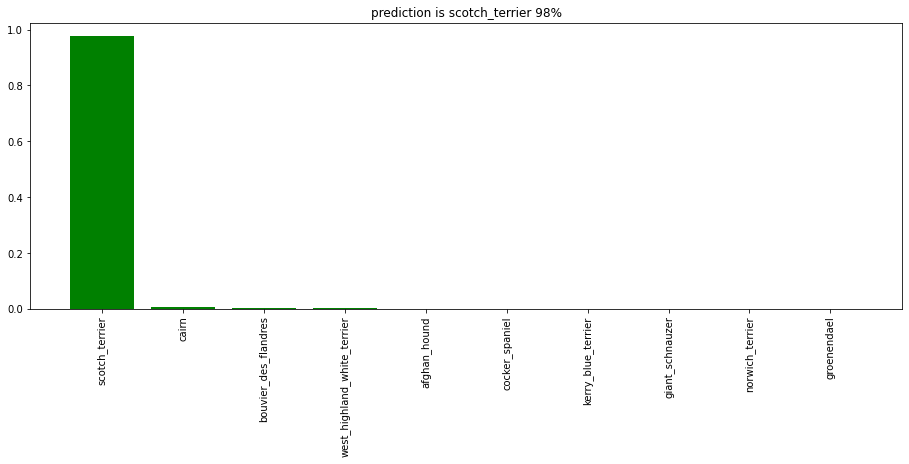

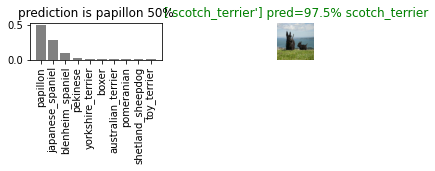

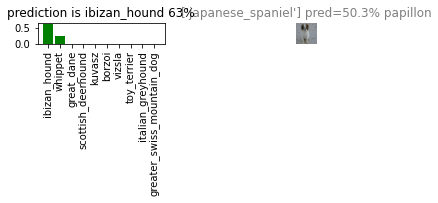

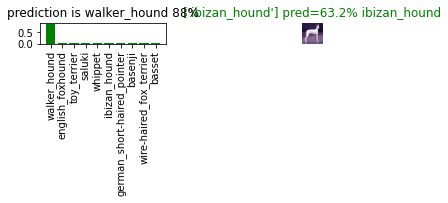

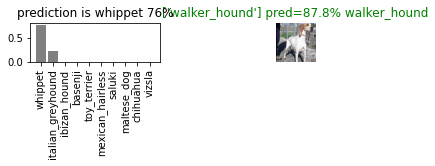

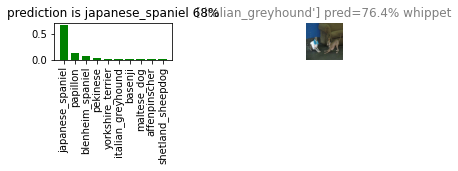

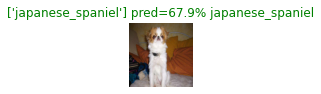

In [ ]:
Visualiz_3(image=imagge,
           truth_label=labbel,
           prediction=prediction)

# training on full dataset (10,000) images

In [ ]:
def full_dataset_model():
  #training on full dataset
  full_dataset = Tensor_batches(X,Y,Train_data=True)
  #model function
  full_model = Create_model()
  #tensorboard callback
  full_data_tensor_callback = tensorboard_callback()
  #early stopping callback
  full_data_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=3)
  print(f'training with: {MODEL_URL} .........:)')
  full_model.fit(x=full_dataset,
                epochs=NUM_EPOCHS,
                callbacks=[full_data_tensor_callback,full_data_early_stopping])
  return full_model

In [ ]:
#ful_model = full_dataset_model()

In [ ]:
# function to save model
def save_model(model,SUFFIX=None):
  model_dir = os.path.join('drive/MyDrive/Dog-Vision-Project/models',
                            dt.datetime.now().strftime('%Y%m%d-%H%M%S'))
  model_path = model_dir+'-'+SUFFIX+'.h5'
  print(f'saving model to: {model_path} .....:)')
  model.save(model_path)
  return model_path

In [ ]:
save_model = save_model(ful_model,'model trained on +10000 images')


NameError: ignored

In [ ]:
#function to load model
def load_model(model_path):
  '''
  function to load saved model from model directory
  '''
  print(f'loading model from {model_path} ..........:)')
  load = tf.keras.models.load_model(filepath=model_path,
                                    custom_objects={'KerasLayer':hub.KerasLayer})
  return load

In [ ]:
MODEL = load_model('drive/MyDrive/Dog-Vision-Project/models/20210604-192522-model trained on +10000 images.h5')

loading model from drive/MyDrive/Dog-Vision-Project/models/20210604-192522-model trained on +10000 images.h5 ..........:)


# cleaning test dataset(EDA)

In [ ]:
#importing test datas and converting dataset to filepath

In [ ]:
test_path = 'drive/MyDrive/Dog-Vision-Project/test/'
test_file = [test_path+file for file in os.listdir('drive/MyDrive/Dog-Vision-Project/test')]

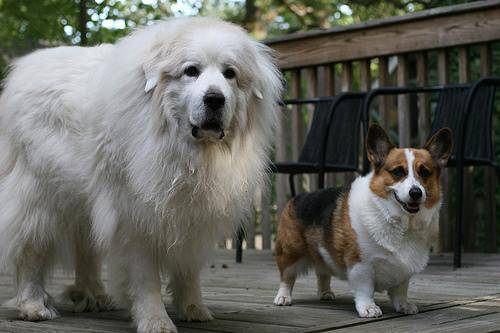

In [ ]:
Image(test_file[75])

In [ ]:
test_file[:10]

['drive/MyDrive/Dog-Vision-Project/test/e01a1ea716359e2f0062aca591ff9ca4.jpg',
 'drive/MyDrive/Dog-Vision-Project/test/e7dc8cc599049ea9fa2a172c88646c57.jpg',
 'drive/MyDrive/Dog-Vision-Project/test/e1fa4eb8a57184773ac11efe0de11e92.jpg',
 'drive/MyDrive/Dog-Vision-Project/test/e004d9f3a6236e2de6dd0f386b685059.jpg',
 'drive/MyDrive/Dog-Vision-Project/test/e47de0441a48f2eff7c2faacd350ed06.jpg',
 'drive/MyDrive/Dog-Vision-Project/test/dfe02d52ca281aaca6215a42fee6245c.jpg',
 'drive/MyDrive/Dog-Vision-Project/test/e1e7949f64ff3283a5dafa9d39199193.jpg',
 'drive/MyDrive/Dog-Vision-Project/test/e732916519751eaa0cb2ba0cc1217ab9.jpg',
 'drive/MyDrive/Dog-Vision-Project/test/dd7867245d5c104fffb5afe027e41cd1.jpg',
 'drive/MyDrive/Dog-Vision-Project/test/e440ec011c3c7ea94838ab5fc466159c.jpg']

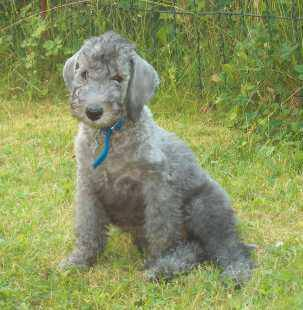

In [ ]:
Image(test_file[8])

In [ ]:
#change filepath(test_file) to tensors
test_to_tensor = Tensor_batches(X=test_file)

creating test dataset..........:)


In [ ]:
#making predictions on test dataset
PREDICTIONS = MODEL.predict(test_to_tensor,
                            verbose=1)

324/324 [==============================] - 1127s 3s/step


In [ ]:
np.savetxt('drive/MyDrive/Dog-Vision-Project/Prediction.txt',PREDICTIONS,delimiter=',')

In [ ]:
pre = np.loadtxt('drive/MyDrive/Dog-Vision-Project/Prediction.txt',delimiter=',')

In [ ]:
pre[:10]

array([[2.48712081e-06, 4.36860219e-08, 1.18232855e-08, ...,
        4.88843743e-10, 3.40597661e-09, 3.39268672e-06],
       [1.34623622e-06, 6.13187865e-08, 3.23631824e-08, ...,
        6.35294040e-10, 4.19703974e-06, 1.75621471e-06],
       [8.01228339e-07, 1.63655187e-08, 5.26683728e-08, ...,
        1.26717603e-09, 5.06590595e-07, 2.85291719e-07],
       ...,
       [2.05407677e-10, 1.88719693e-10, 4.65567580e-13, ...,
        1.31809266e-12, 3.67501890e-10, 9.51469015e-10],
       [1.83495952e-09, 5.97774319e-09, 2.33044108e-08, ...,
        8.01980038e-10, 9.76596311e-07, 3.53054155e-08],
       [8.50767265e-07, 1.74826065e-09, 7.14338311e-11, ...,
        5.23937782e-10, 6.12271478e-08, 4.33945075e-07]])

In [ ]:
#np.savetxt('predic.csv',[PREDICTIONS],delimiter=',',fmt='%d')

In [ ]:
sam_sub = pd.read_csv('drive/MyDrive/Dog-Vision-Project/sample_submission.csv')

In [ ]:
sam_sub

id  ...  yorkshire_terrier
0      000621fb3cbb32d8935728e48679680e  ...           0.008333
1      00102ee9d8eb90812350685311fe5890  ...           0.008333
2      0012a730dfa437f5f3613fb75efcd4ce  ...           0.008333
3      001510bc8570bbeee98c8d80c8a95ec1  ...           0.008333
4      001a5f3114548acdefa3d4da05474c2e  ...           0.008333
...                                 ...  ...                ...
10352  ffeda8623d4eee33c6d1156a2ecbfcf8  ...           0.008333
10353  fff1ec9e6e413275984966f745a313b0  ...           0.008333
10354  fff74b59b758bbbf13a5793182a9bbe4  ...           0.008333
10355  fff7d50d848e8014ac1e9172dc6762a3  ...           0.008333
10356  fffbff22c1f51e3dc80c4bf04089545b  ...           0.008333

[10357 rows x 121 columns]

In [ ]:
test_filename = [os.path.splitext(fname)[0] for fname in os.listdir('drive/MyDrive/Dog-Vision-Project/test/')]

In [ ]:
test_filename[:23]

['e01a1ea716359e2f0062aca591ff9ca4',
 'e7dc8cc599049ea9fa2a172c88646c57',
 'e1fa4eb8a57184773ac11efe0de11e92',
 'e004d9f3a6236e2de6dd0f386b685059',
 'e47de0441a48f2eff7c2faacd350ed06',
 'dfe02d52ca281aaca6215a42fee6245c',
 'e1e7949f64ff3283a5dafa9d39199193',
 'e732916519751eaa0cb2ba0cc1217ab9',
 'dd7867245d5c104fffb5afe027e41cd1',
 'e440ec011c3c7ea94838ab5fc466159c',
 'e7ed96b272013c6de9505a753816ce75',
 'f14672c3ea8086560de6b7e79f9b90d1',
 'e917abf625ad6ba5b8a0e59bd23e8818',
 'ec429df7ceab9763e4e790b569997346',
 'edb8b962718cd953921e6449788c6939',
 'f56080803871563e96541a57ad1a08c4',
 'edd5c8d96746d4af7eed0550eafd4b90',
 'e850770a6575a34b1c7ad4b401692553',
 'ee0582b96b135f5e036e011d53baa087',
 'edca6e9a7f6f35f9b0313d8aaaf844be',
 'e8899ab63ea8630d50f0b321cb4bf811',
 'f58ce44146db339a0bba50bcecb02730',
 'f3094e7b2a65b2fa50e0f4ac2e3021b4']

In [ ]:
df1 = pd.DataFrame(test_filename,columns=['id'])
df2 = pd.DataFrame(pre,columns=unique_breed)

In [ ]:
Result_csv = pd.concat([df1,df2],axis=1,join='inner')

In [ ]:
Result_csv

id  ...  yorkshire_terrier
0      e01a1ea716359e2f0062aca591ff9ca4  ...       3.392687e-06
1      e7dc8cc599049ea9fa2a172c88646c57  ...       1.756215e-06
2      e1fa4eb8a57184773ac11efe0de11e92  ...       2.852917e-07
3      e004d9f3a6236e2de6dd0f386b685059  ...       1.168708e-06
4      e47de0441a48f2eff7c2faacd350ed06  ...       1.678934e-07
...                                 ...  ...                ...
10352  07e56f8e36196be69405e4c524c99b98  ...       3.132286e-07
10353  08152b214c5b628d9e70f609230fd51c  ...       9.098252e-07
10354  07e62ee044a6b7d6a45e92c65ff44f4e  ...       2.002738e-07
10355  08699bdbc18bde158cdc4969b6c51d81  ...       5.791524e-10
10356  07ce92f83426286eaba1b9459d305fca  ...       7.894773e-09

[10357 rows x 121 columns]

In [ ]:
Result_csv.to_csv('drive/MyDrive/Dog-Vision-Project/Result.csv',index=False)

In [ ]:
#res = pd.read_csv('drive/MyDrive/Dog-Vision-Project/Result.csv')
#res

id  ...  yorkshire_terrier
0      e01a1ea716359e2f0062aca591ff9ca4  ...       3.392687e-06
1      e7dc8cc599049ea9fa2a172c88646c57  ...       1.756215e-06
2      e1fa4eb8a57184773ac11efe0de11e92  ...       2.852917e-07
3      e004d9f3a6236e2de6dd0f386b685059  ...       1.168708e-06
4      e47de0441a48f2eff7c2faacd350ed06  ...       1.678934e-07
...                                 ...  ...                ...
10352  07e56f8e36196be69405e4c524c99b98  ...       3.132286e-07
10353  08152b214c5b628d9e70f609230fd51c  ...       9.098252e-07
10354  07e62ee044a6b7d6a45e92c65ff44f4e  ...       2.002738e-07
10355  08699bdbc18bde158cdc4969b6c51d81  ...       5.791524e-10
10356  07ce92f83426286eaba1b9459d305fca  ...       7.894773e-09

[10357 rows x 121 columns]